In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',1000)

In [2]:
#Read in merged paint data file
df = pd.read_csv('Paint_Data_Merged.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(30)

metric  value                 time  is_prod  count
0   E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
1   E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2   E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
3   E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
4   E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
5   E_C100  110.0  2022-04-15 05:00:00      0.0    0.0
6   E_C100  100.0  2022-04-15 06:00:00      0.0    0.0
7   E_C100  110.0  2022-04-15 07:00:00      0.0    0.0
8   E_C100  110.0  2022-04-15 08:00:00      0.0    0.0
9   E_C100  110.0  2022-04-15 09:00:00      0.0    0.0
10  E_C100  110.0  2022-04-15 10:00:00      0.0    0.0
11  E_C100  110.0  2022-04-15 11:00:00      0.0    0.0
12  E_C100  120.0  2022-04-15 12:00:00      0.0    0.0
13  E_C100  120.0  2022-04-15 13:00:00      0.0    0.0
14  E_C100  110.0  2022-04-15 14:00:00      0.0    0.0
15  E_C100  120.0  2022-04-15 15:00:00      0.0    0.0
16  E_C100  120.0  2022-04-15 16:00:00      0.0    0.0
17  E_C100  110.0  2022-04-15 17:00:00      0.0    0.0
18  E_C100  110.0  2022-04-15 18:00:00      0.0    0.0
19  E_C100  120.0  2022-04-15 19:00:00      0.0    0.0
20  E_C100  130.0  2022-04-15 20:00:00      0.0    0.0
21  E_C100  120.0  2022-04-15 21:00:00      0.0    0.0
22  E_C100  110.0  2022-04-15 22:00:00      0.0    0.0
23  E_C100  120.0  2022-04-15 23:00:00      0.0    0.0
24  E_C100  120.0  2022-04-16 00:00:00      0.0    0.0
25  E_C100  120.0  2022-04-16 01:00:00      0.0    0.0
26  E_C100  110.0  2022-04-16 02:00:00      0.0    0.0
27  E_C100  120.0  2022-04-16 03:00:00      0.0    0.0
28  E_C100  120.0  2022-04-16 04:00:00      0.0    0.0
29  E_C100  120.0  2022-04-16 05:00:00      0.0    0.0

In [3]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

In [4]:
df['metric'].unique()

array(['E_C100', 'E_C1000', 'E_C1100', 'E_C1200', 'E_C200', 'E_C300',
       'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800'], dtype=object)

In [5]:
meters = ['E_C100', 'E_C200', 'E_C300', 'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800']

In [6]:
def df_to_X_y_multivar(df, X_start = [], y_start = [], window_size = 10):
    df_as_np= df.to_numpy()
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return X, y 

In [7]:
df

metric  value                 time  is_prod  count
time                                                                   
2022-04-15 00:00:00  E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
2022-04-15 01:00:00  E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2022-04-15 02:00:00  E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
2022-04-15 03:00:00  E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
2022-04-15 04:00:00  E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
...                     ...    ...                  ...      ...    ...
2022-06-29 06:00:00  E_C800  300.0  2022-06-29 06:00:00      0.0   63.0
2022-06-29 07:00:00  E_C800  310.0  2022-06-29 07:00:00      1.0   71.0
2022-06-29 08:00:00  E_C800  300.0  2022-06-29 08:00:00      1.0   56.0
2022-06-29 09:00:00  E_C800  300.0  2022-06-29 09:00:00      1.0   75.0
2022-06-29 10:00:00  E_C800  300.0  2022-06-29 10:00:00      1.0   27.0

[19921 rows x 5 columns]

In [8]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df['value'])

In [9]:
usage_df = df

usage_df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df['Day sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Day cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Year sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/year))
usage_df['Year cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/year))

usage_df = usage_df.drop(['Seconds'], axis =1)
usage_df = usage_df.loc[usage_df['metric'].isin(meters)]

usage_df = pd.get_dummies(usage_df, columns=['metric'])
usage_df = usage_df.drop(['time'], axis = 1)

In [10]:
usage_df

value  is_prod  count       Day sin       Day cos  \
time                                                                     
2022-04-15 00:00:00  390.0      0.0    0.0 -1.271365e-11  1.000000e+00   
2022-04-15 01:00:00  120.0      0.0    0.0  2.588190e-01  9.659258e-01   
2022-04-15 02:00:00  120.0      0.0    0.0  5.000000e-01  8.660254e-01   
2022-04-15 03:00:00  120.0      0.0    0.0  7.071068e-01  7.071068e-01   
2022-04-15 04:00:00  110.0      0.0    0.0  8.660254e-01  5.000000e-01   
...                    ...      ...    ...           ...           ...   
2022-06-29 06:00:00  300.0      0.0   63.0  1.000000e+00  1.302874e-11   
2022-06-29 07:00:00  310.0      1.0   71.0  9.659258e-01 -2.588190e-01   
2022-06-29 08:00:00  300.0      1.0   56.0  8.660254e-01 -5.000000e-01   
2022-06-29 09:00:00  300.0      1.0   75.0  7.071068e-01 -7.071068e-01   
2022-06-29 10:00:00  300.0      1.0   27.0  5.000000e-01 -8.660254e-01   

                     Year sin  Year cos  metric_E_C100  metric_E_C200  \
time                                                                    
2022-04-15 00:00:00  0.974794 -0.223108              1              0   
2022-04-15 01:00:00  0.974634 -0.223807              1              0   
2022-04-15 02:00:00  0.974473 -0.224505              1              0   
2022-04-15 03:00:00  0.974312 -0.225204              1              0   
2022-04-15 04:00:00  0.974150 -0.225902              1              0   
...                       ...       ...            ...            ...   
2022-06-29 06:00:00  0.051263 -0.998685              0              0   
2022-06-29 07:00:00  0.050547 -0.998722              0              0   
2022-06-29 08:00:00  0.049832 -0.998758              0              0   
2022-06-29 09:00:00  0.049116 -0.998793              0              0   
2022-06-29 10:00:00  0.048400 -0.998828              0              0   

                     metric_E_C300  metric_E_C400  metric_E_C500  \
time                                                               
2022-04-15 00:00:00              0              0              0   
2022-04-15 01:00:00              0              0              0   
2022-04-15 02:00:00              0              0              0   
2022-04-15 03:00:00              0              0              0   
2022-04-15 04:00:00              0              0              0   
...                            ...            ...            ...   
2022-06-29 06:00:00              0              0              0   
2022-06-29 07:00:00              0              0              0   
2022-06-29 08:00:00              0              0              0   
2022-06-29 09:00:00              0              0              0   
2022-06-29 10:00:00              0              0              0   

                     metric_E_C600  metric_E_C700  metric_E_C800  
time                                                              
2022-04-15 00:00:00              0              0              0  
2022-04-15 01:00:00              0              0              0  
2022-04-15 02:00:00              0              0              0  
2022-04-15 03:00:00              0              0              0  
2022-04-15 04:00:00              0              0              0  
...                            ...            ...            ...  
2022-06-29 06:00:00              0              0              1  
2022-06-29 07:00:00              0              0              1  
2022-06-29 08:00:00              0              0              1  
2022-06-29 09:00:00              0              0              1  
2022-06-29 10:00:00              0              0              1  

[14488 rows x 15 columns]

In [11]:
metric_cols = ['metric_E_C100','metric_E_C200','metric_E_C300','metric_E_C400','metric_E_C500','metric_E_C600','metric_E_C700','metric_E_C800']
WINDOW_SIZE= 24
X = []
y = []

for meter in metric_cols:
    df_subset = usage_df.loc[usage_df[meter]==1].copy()
    
    X, y= df_to_X_y_multivar(df_subset, X, y, WINDOW_SIZE) 

    print(len(X))
X = np.array(X)
y = np.array(y)

    

1787
3574
5361
7148
8935
10722
12509
14296


In [12]:
#Split arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

usage_training_mean = np.mean(X_train[:,:,0])
usage_training_std = np.std(X_train[:,:,0])

print('mean: ',usage_training_mean )
print('std: ',usage_training_std )

def preprocess(X_temp):
    X_temp[:,:,0] = (X_temp[:,:,0] - usage_training_mean) / usage_training_std
    return X_temp

def preprocess_output(y_temp):
    y_temp = (y_temp - usage_training_mean) / usage_training_std
    return y_temp

def postprocess_output(y_temp):
    y_temp = (y_temp* usage_training_std ) + usage_training_mean
    return y_temp


pp_X_train = preprocess(X_train)
pp_y_train = preprocess_output(y_train)

pp_X_test = preprocess(X_test)
pp_y_test = preprocess_output(y_test)

mean:  361.1588040690218
std:  299.8906283956299


In [13]:
usage_training_mean

361.1588040690218

In [14]:
 
test = np.array([1060, 1040, 1040])    


test = preprocess_output(test)


(test* usage_training_std ) + usage_training_mean

array([1060., 1040., 1040.])

<h1>Model</h1>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#model2 = Sequential()
#model2.add(InputLayer((WINDOW_SIZE, 15)))
#model2.add(GRU(64))
#model2.add(Dense(8,'relu'))
#model2.add(Dense(1,'linear'))

#model2.summary()



model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, activation='swish', input_shape=(WINDOW_SIZE, 15)))
model.add(SimpleRNN(128, return_sequences=True, activation='swish'))
model.add(SimpleRNN(64, return_sequences=False, activation='swish'))
#Add dense layer
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24, 64)            5120      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 24, 128)           24704     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 48,449
Trainable params: 48,449
Non-traina

In [16]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [17]:
model.fit(pp_X_train, pp_y_train, validation_data=(pp_X_test, pp_y_test), epochs=(15))

Epoch 1/15
358/358 [==============================] - 6s 12ms/step - loss: 0.5853 - root_mean_squared_error: 0.7651 - val_loss: 0.1663 - val_root_mean_squared_error: 0.4078
Epoch 2/15
358/358 [==============================] - 4s 11ms/step - loss: 0.1335 - root_mean_squared_error: 0.3654 - val_loss: 0.2444 - val_root_mean_squared_error: 0.4943
Epoch 3/15
358/358 [==============================] - 4s 11ms/step - loss: 0.1114 - root_mean_squared_error: 0.3337 - val_loss: 0.1293 - val_root_mean_squared_error: 0.3596
Epoch 4/15
358/358 [==============================] - 4s 11ms/step - loss: 0.1026 - root_mean_squared_error: 0.3203 - val_loss: 0.1038 - val_root_mean_squared_error: 0.3221
Epoch 5/15
358/358 [==============================] - 4s 11ms/step - loss: 0.0908 - root_mean_squared_error: 0.3014 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3301
Epoch 6/15
358/358 [==============================] - 4s 11ms/step - loss: 0.0853 - root_mean_squared_error: 0.2921 - val_loss: 0.0856 

In [18]:
pp_X_test.shape

(2860, 24, 15)

In [19]:
test_predictions = model.predict(pp_X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':postprocess_output(test_predictions), 'Actuals': y_test})
test_results.head(100)

90/90 [==============================] - 1s 4ms/step


Test Predictions  Actuals
0         530.224731    670.0
1         258.780304    310.0
2         116.876129    160.0
3         783.617920    770.0
4         629.025513    680.0
5         113.910706     50.0
6         404.319580    450.0
7         743.268921    710.0
8         762.573608    900.0
9          60.762115     40.0
10         25.426361     20.0
11          0.758545     30.0
12        549.362122    590.0
13        445.896912    470.0
14        706.427734    690.0
15        629.356689    600.0
16        178.130753    210.0
17        189.714615    270.0
18        558.021729    600.0
19       1055.714600   1080.0
20        235.167206    300.0
21        278.521637    250.0
22        456.252533    430.0
23        650.937256    630.0
24        484.328064    450.0
25        946.759277    950.0
26        337.791473    160.0
27        284.967224    280.0
28         12.411041     10.0
29        765.822266    790.0
30        206.009262    270.0
31        349.572205    740.0
32         11.660065     10.0
33         16.544495     10.0
34        638.125366    650.0
35        322.609283    240.0
36        189.559189    220.0
37          4.896667     90.0
38        796.008545    760.0
39        123.125031    130.0
40         98.804993    120.0
41         19.824280     30.0
42          8.356445     10.0
43        663.137024    680.0
44        461.580780    480.0
45        777.397522    740.0
46        519.447998    440.0
47        282.983856    310.0
48        412.125854    470.0
49        277.142242    310.0
50         11.856293     10.0
51        340.220154    340.0
52        391.846466    310.0
53        328.686279    320.0
54       1054.797119   1070.0
55        265.123474    260.0
56        285.730896    280.0
57        620.577942    680.0
58        275.653351    270.0
59         52.084106     60.0
60         15.973267     20.0
61        155.115067    300.0
62        426.459778    650.0
63        586.358582    540.0
64        328.048309     40.0
65        776.077209    770.0
66        596.677673    640.0
67         70.166901    160.0
68        132.065811    130.0
69        240.756531    310.0
70        656.614624    720.0
71        102.850159    120.0
72        684.708618    660.0
73          2.044403     10.0
74        229.898453    310.0
75        187.338516    210.0
76        698.102661    670.0
77       -249.697937      0.0
78        139.419785    160.0
79        113.696106    130.0
80        149.390213    290.0
81          9.341827     10.0
82        165.203033      0.0
83         86.364868     70.0
84        653.539856    640.0
85        236.607147    210.0
86        339.884094    320.0
87        343.754791      0.0
88        352.214050    310.0
89        501.684387    470.0
90        422.398773    250.0
91        274.645782    360.0
92        649.469360    640.0
93         49.658417     30.0
94        109.737869    120.0
95        744.981079    780.0
96        474.663696    480.0
97         51.037018     60.0
98        124.566696    130.0
99        223.460022    210.0

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, postprocess_output(test_predictions), squared=False)

83.70498401329543

In [21]:
test_predictions

array([ 0.5637585, -0.3413862, -0.8145726, ..., -0.504526 , -0.2763067,
       -1.1569624], dtype=float32)

In [22]:
train_predictions = model.predict(preprocess(X)).flatten()
train_results=pd.DataFrame(data={'Train Predictions':postprocess_output(train_predictions), 'Actuals': y})
train_results.head(100)

447/447 [==============================] - 2s 4ms/step


Train Predictions  Actuals
0           75.110260    120.0
1           84.042267    120.0
2           95.143372    110.0
3           84.322479    120.0
4          127.776794    120.0
5          112.750580    120.0
6          123.327896    130.0
7          115.751801    150.0
8          161.412964    160.0
9          167.527359    160.0
10         167.611389    160.0
11         156.987564    150.0
12         142.498764    150.0
13         139.854416    150.0
14         130.504379    130.0
15         113.066513    130.0
16         107.017899    120.0
17          93.941315    120.0
18         102.743378    130.0
19         101.423096    130.0
20         108.790894    130.0
21         104.258759    130.0
22         101.002625    130.0
23          96.736420    130.0
24          93.141113    120.0
25          82.355133    130.0
26         108.168182    130.0
27         121.037796    130.0
28         151.073364    130.0
29         128.450760    120.0
30         114.756302    130.0
31         124.445450    120.0
32         106.142273    120.0
33         120.701508    130.0
34         122.612152    130.0
35         134.123688    130.0
36         124.485458    120.0
37         106.157715    120.0
38         108.886673    120.0
39          99.975433    120.0
40         103.515961    120.0
41          95.007385    120.0
42          97.312775    120.0
43          97.419739    130.0
44         107.489120    130.0
45         105.985291    130.0
46         103.542358    130.0
47          93.475433    130.0
48          93.851379    130.0
49          95.507507    130.0
50         110.598450    130.0
51         125.441101    130.0
52         140.974380    130.0
53         136.070160    130.0
54         129.783768    120.0
55         105.938278    130.0
56         128.891937    140.0
57         137.548706    130.0
58         132.214630    130.0
59         125.024216    340.0
60         417.183899    480.0
61         514.229309    480.0
62         560.435791    470.0
63         476.099426    480.0
64         453.645142    470.0
65         447.480347    580.0
66         540.175659    550.0
67         524.740784    560.0
68         526.313049    550.0
69         513.793884    570.0
70         520.907043    540.0
71         507.685120    420.0
72         376.975128    310.0
73         339.083008    330.0
74         388.508331    420.0
75         635.354187    610.0
76         624.153809    570.0
77         724.286987    720.0
78         861.416016    840.0
79         931.495422    950.0
80        1029.954346    980.0
81        1053.537109   1050.0
82        1059.182617   1090.0
83        1089.325317   1070.0
84        1018.383606   1030.0
85        1066.923340   1090.0
86        1005.532104   1070.0
87         921.735046    950.0
88         980.669067    990.0
89         999.725098   1100.0
90        1053.873047   1080.0
91        1046.855713   1090.0
92        1045.821777   1060.0
93        1060.103027   1100.0
94         994.186157   1090.0
95        1039.201294   1090.0
96         955.705322   1000.0
97         753.158875    780.0
98         539.218567    390.0
99         178.130753    210.0

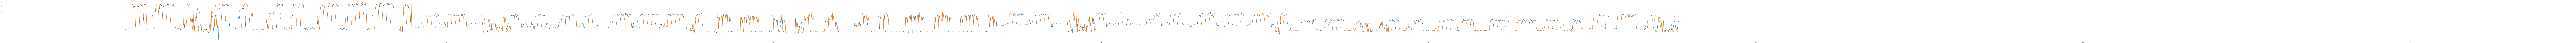

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(900,15))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

<h1>Validation Set and Bootstrapping</h1>

In [24]:
WINDOW_SIZE = 24


df_val = pd.read_csv('Val_Paint_Data_Merged.csv')
df_val = df_val.drop(['Unnamed: 0'], axis=1)
df_val.index = pd.to_datetime(df_val['time'], format='%Y.%m.%d %H:%M:%S')
df_val.head(30)

usage_df_val = df_val

usage_df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df_val['Day sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Day cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Year sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/year))
usage_df_val['Year cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/year))

usage_df_val = usage_df_val.drop(['Seconds'], axis =1)
usage_df_val = usage_df_val.loc[usage_df_val['metric'].isin(meters)]

#make dummy variables for the values in column 'metric'
usage_df_val = pd.get_dummies(usage_df_val, columns=['metric'])
#Drop 'time' column
usage_df_val = usage_df_val.drop(['time'], axis = 1)

preds = []
acts = []

start_point = 100

for i in range(24*7):
    bootstrap_x = np.expand_dims(usage_df_val.to_numpy()[i + start_point :i + start_point + WINDOW_SIZE], 0)
    #print(bootstrap_x)
    pred_y = postprocess_output(model.predict(preprocess(bootstrap_x)))[0][0]
    act_y = usage_df_val.to_numpy()[start_point + i+WINDOW_SIZE][0]
    usage_df_val.iloc[start_point + i+WINDOW_SIZE, 0] = pred_y
    
    preds.append(pred_y)
    acts.append(act_y)
    
    
    #print(pred_y)
    #print(act_y)
    #print('--------')

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


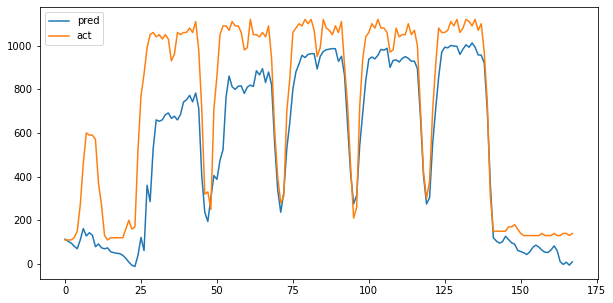

In [25]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(acts, preds, squared=False)

228.66681042942932

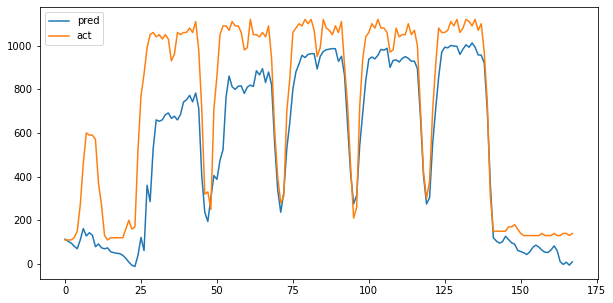

In [27]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")
